In [28]:
%pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /Users/oxfist/.pyenv/versions/3.12.2/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Redes Feed Forward en Keras

In [29]:
import numpy as np
from tensorflow import keras

In [30]:
# Una red feed forward en keras se puede crear con keras.Sequential

red_de_prueba = keras.Sequential()

# Por ahora nuestra red está vacía

In [31]:
# Se pueden agregar capas con el método .add
# Por ahora usaremos capas densas, que se crean con keras.layers.Dense
# Una capa dense está definida por la cantidad de neuronas y la
# función de activación. También se le puede asignar un nombre.
#
# El siguiente código agrega dos capas:
# - una primera capa con 30 neuronas y activación sigmoid
# - una segunnda capa con 20 neuronas y activación relu
#
# Nota que a la primera capa debes decirle el tamaño de la entrada
# Estamos suponiendo que la entrada es de tamaño 40.

red_de_prueba = keras.Sequential()

red_de_prueba.add(
    keras.layers.Dense(30, input_dim=40, activation='sigmoid',
                       name='primera_capa')
)

red_de_prueba.add(
    keras.layers.Dense(20, activation='relu', name='segunda_capa')
)

# Se puede ver un resumen de la red hasta ahora con .summary

print(red_de_prueba.output_shape)
red_de_prueba.summary()

(None, 20)


/Users/oxfist/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 20)             │           620 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,850 (7.23 KB)

 Trainable params: 1,850 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Podemos agregar otra capa sobre las anteriores
# La capa también se puede crear en una variable y luego usarla

red_de_prueba.add(keras.layers.Dense(1, activation='sigmoid', name='ultima'))

# Nuestra red debiera tener ahora 3 capas
red_de_prueba.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ultima (Dense)                  │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,871 (7.31 KB)

 Trainable params: 1,871 (7.31 KB)

 Non-trainable params: 0 (0.00 B)

## Ejercicio 1
Crea una red de nombre `red` con 3 capas escondidas con las siguientes dimensiones  (el primer numero es el tamaño del input, el ultimo el tamaño del output):

30 --> 20 --> 10 --> 20 --> 4

y con activaciones `'relu'`, `'sigmoid'`, `'relu'`, `'softmax'`. Ponle nombres "primera", "segunda", "tercera" y "final" a las capas de tu red. Tu código debiera comenzar con  `red = keras.Sequential()`.

Al terminar tu código y ejecutar `red.summary()` debieras ver un texto como el siguiente:

```txt
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
primera (Dense)              (None, 20)                620       
_________________________________________________________________
segunda (Dense)              (None, 10)                210       
_________________________________________________________________
tercera (Dense)              (None, 20)                220       
_________________________________________________________________
final (Dense)                (None, 4)                 84        
=================================================================
Total params: 1,134                                              
Trainable params: 1,134                                          
Non-trainable params: 0                                          
_________________________________________________________________
```

In [33]:
# Acá empieza tu código (~5 líneas)
red = keras.Sequential()

red.add(keras.layers.Dense(20, input_dim=30, activation="relu", name="1st_layer"))
red.add(keras.layers.Dense(10, activation="sigmoid", name="2nd_layer"))
red.add(keras.layers.Dense(20, activation="relu", name="3rd_layer"))
red.add(keras.layers.Dense(4, activation="softmax", name="output_layer"))


print(red.output_shape)
red.summary()

(None, 4)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_layer (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_layer (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 3rd_layer (Dense)               │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,134 (4.43 KB)

 Trainable params: 1,134 (4.43 KB)

 Non-trainable params: 0 (0.00 B)

## Ejercicio 2

Una red sin pesos no puede hacer nada realmente. En este ejercicio agregaremos pesos al azar a cada capa de la red. Más adelante agregaremos pesos con sentido.

In [34]:
np.random.seed(30) # esto es para que el proceso sea repetible

# La primera capa es de dimensiones 30x20 con un bias de tamaño 20.
# El siguiente código crea matrices de pesos y bias para la primera
# capa de nuestra red anterior

W1 = np.random.randn(30,20).astype('float32')
b1 = np.random.randn(20).astype('float32')

In [35]:
# Con este código podemos setear los pesos directamente en la primera capa

red.get_layer('1st_layer').set_weights((W1,b1))

In [36]:
# podemos ver que los pesos sean efectivamente los mismos haciendo esto

(W, b) = red.get_layer('1st_layer').get_weights()
print(W[10][10], W1[10][10])

-0.49068466 -0.49068466


Crea pesos y bias para todas las capas que restan (segunda, tercera, y final). Ponle los siguientes nombres a los pesos y bias: `W2`, `b2`, `W3`, `b3`, `U`,  y `c`.

Al terminar tu código (si ejecutas todo bien desde el `np.random.seed(30)`), al ejecutar esta línea de código

```python
print(red.get_layer('final').get_weights()[0][0,3])
```

debieras obtener el valor `0.689416`.



In [37]:
# Genera los nuevos pesos y bias
# Acá empieza tu código (~6 líneas)
W2 = np.random.randn(20, 10).astype('float32')
b2 = np.random.randn(10).astype('float32')
W3 = np.random.randn(10, 20).astype('float32')
b3 = np.random.randn(20).astype('float32')
U = np.random.randn(20, 4).astype('float32')
c = np.random.randn(4).astype('float32')
# Acá termina tu código

In [38]:
# Ahora asigna los pesos a cada capa
# Acá empieza tu código (~3 líneas)
red.get_layer('2nd_layer').set_weights((W2, b2))
red.get_layer('3rd_layer').set_weights((W3, b3))
red.get_layer('output_layer').set_weights((U, c))
# Acá termina tu código
# Pro-tip: puedes referirte a una capa por su índice
# usando red.layers[i].

In [39]:
# Si todo anduvo bien, el valor de la variable impresa abajo
# debiera ser 0.689416 (no olvides ejecutar todo el código desde
# que se asigna la semilla).

print(red.get_layer('output_layer').get_weights()[0][0,3])

0.689416


## Ejercicio 3: Pasada hacia adelante por la red

Una vez creada la red y los pesos, se puede usar la red completa para pasar un conjunto de datos completo por ella, también llamado "predicción". Para esto crearemos conjuntos de datos aleatorios.

In [40]:
# Primero creamos datos de entrada (también random).
# Crearemos M=1000 casos

np.random.seed(30)
M = 1000
X = np.random.randn(M, 30)

In [41]:
# Para seleccionar los datos desde la posición i a la j hacemos X[i:j+1]
# Lo siguiente muestra los ejemplos de las posiciones 30, 31 y 32

print(X[30:33])

[[ 0.02774178  0.4898778   0.42023164 -0.28935611  0.03058479  0.43415183
   1.99952698  0.43156425 -0.99050523 -0.05710909  1.10122304  1.29250437
   0.54052745  1.25239432  1.02688276 -0.10774856  0.12366795  1.00560067
  -0.59393001 -0.07775604  0.63217615  0.90495627  0.68279093 -1.68561859
  -0.77282981  0.41267801  0.14633539 -0.29860478 -0.27525187  0.44420499]
 [-0.67035023  0.49450513  2.55843712  2.19707903  0.16479335  0.75229629
   0.71596993 -1.28622365  0.37660482 -1.09513919 -0.20031038 -1.1451353
  -0.39797647 -0.71142084 -1.80980539  1.05754653  0.03537652  1.17215615
  -0.47500267 -0.09322557  0.10460944 -0.59988213 -0.875007   -1.26971285
   0.51133401 -0.37615699  1.51819677  0.25781382  0.36449487 -0.10589305]
 [-1.18845366  0.53925576  3.15520268  0.71549632  0.58096965  0.19820515
  -0.95753055 -1.11376489  1.09200004  1.6566401   0.48958599  0.44022759
   1.34185802 -0.77255487 -1.52307972  0.92506015  1.15050752 -0.46007198
   1.50099056  0.40347495  0.38191204

In [42]:
# Para predecir con la red, simplemente usamos red.predict() y le pasamos
# todos los ejemplos para los que queremos que haga una predicción.
# Lo siguiente genera la predicción para los ejemplos 30, 31 y 32.
# Nota que el resultado es un arreglo/matriz de 3x4 (note el uso de shape)

Pred = red.predict(X[30:33])
print(Pred)
print('tamaño:', Pred.shape)
print(type(Pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[9.9997497e-01 1.3936742e-05 1.0377056e-05 7.1393998e-07]
 [9.9999905e-01 3.1560728e-07 5.8284320e-07 3.1435191e-11]
 [9.9998999e-01 1.9251406e-06 8.1195822e-06 9.6304541e-11]]
tamaño: (3, 4)
<class 'numpy.ndarray'>


Calcula la pasada hacia adelante (predicción) para los ejemplos desde el 890 al 903, ambos inclusive, y guardalos en la variable `Pred`.

Luego imprime el valor `Pred[12,2]` y debiera darte el valor `0.9982584`

In [43]:
# Acá empieza tu código (~2 líneas)
Pred = red.predict(X[890:903])
print(Pred[12,2])
# Acá termina tu código

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0.9982584


## Ejercicio 4: Predicciones como probabilidades

Cuando la red se usa con `softmax` en la última activación genera probabilidades que indican la probabilidad de predicción en cada clase. Para determinar la predicción en cada caso, podemos usar `np.argmax`, que calcula el índice del valor máximo en la predicción.

In [44]:
# Calculemos primero la predicción para los inputs en el rango 0:5

Pred = red.predict(X[0:5])
print(Pred)
print(Pred.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[9.6245760e-01 2.8666478e-04 3.7254222e-02 1.5219048e-06]
 [5.7140422e-01 6.1606744e-04 4.2797640e-01 3.3052002e-06]
 [9.2316657e-01 1.9390080e-05 7.6814003e-02 1.3579297e-10]
 [9.9999034e-01 2.9783266e-08 9.7097372e-06 3.8440671e-11]
 [8.9252228e-03 2.6962394e-01 7.2144854e-01 2.3164444e-06]]
(5, 4)


In [45]:
# np.argmax entrega el índice de la posición de mayor valor.
# Con axis=1, le decimos que el máximo se debe calcular en cada "fila"

clases = np.argmax(Pred, axis=1)
print(clases)
print(clases.shape)

[0 0 0 0 2]
(5,)


Calcula la clase que la red predice para los ejemplos en los índices 199, 549, y 997. Tus resultados debieran ser 2, 0 y 1, respectivamente.

In [46]:
# Acá empieza tu código (~5 líneas)
pred = red.predict(X[[199, 549, 997]])
predicted_clases = np.argmax(pred, axis=1)
print(predicted_clases)
# Acá termina tu código

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[2 0 1]


# Red para MNIST

Ahora construiremos una red para un problema real de detección de números escritos a mano. No entrenaremos la red si no que cargaremos pesos directamente y la usaremos para hacer predicciónes.

Vamos a partir cargando datos desde `keras.datasets.mnist`.

In [47]:
# Carga datos de MNIST (solo cargaremos un conjunto de pruebas).
# Nota el tamaño de los datos

_, (imgs, labs) = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

(10000, 28, 28)
(10000,)


In [48]:
imgs

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

etiqueta: 6
<class 'numpy.ndarray'>


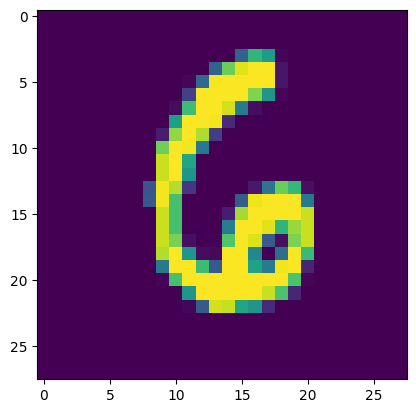

In [49]:
# Podemos visualizar una imagen cualquiera
# (si ejecutas esta celda cambiando 'd' puedes ver una distinta)

from matplotlib import pyplot as plt

d = 81
print('etiqueta:',labs[d])
print(type(imgs[d]))
plt.imshow(imgs[d])

In [50]:
print(imgs.shape)

(10000, 28, 28)


Lo primero que debes notar es que los inputs tienen forma de (10000, 28, 28) lo que será  un problema para cualquier red que hagamos. Por lo que cambiaremos su forma y lo dejaremos todo en una matriz de 10000 x (28*28), esto lo hacemos con el comando `reshape`.

In [51]:
X = imgs.reshape(10000,28*28)
print(X.shape)

(10000, 784)


In [52]:
np.max(X)

255

Lo siguiente que haremos será "normalizar" los valores de entrada, de manera tal que todos estén entre 0 y 1. Más adelante veremos que este paso resulta demasiado importante en el buen funcionamiento de las redes. Las imágenes son valores de intensidad de un pixel de entre 0 y 255. Para normalizarlos simplemente dividimos todos los datos por 255.

In [53]:
# Dividimos por 255
X = X / 255

##  Descripción de la  red para MNIST


En esta parte, usaremos pesos y bias preconstruidos para crear una red que predice (con alta certeza) la etiqueta de imágenes de números escritos a mano en imágenes de 28x28 pixeles. La red tiene esta arquitectura:

784 --> 32 (relu) --> 16 (relu) --> 10 (softmax)

Tu trabajo será crear la red con esa arquitectura usando `keras.Sequential` y `keras.layers.Dense`, usar las funciones de activación correspondientes, cargar los pesos y bias en cada una  de las capas, y luego probar la red haciendo predicciones para ciertos ejemplos.

** Este ejercicio es considerablemente más largo que los anteriores **

## Paso 0: Construyendo las matrices de pesos

Carga los pesos y bias  de la red. Los archivos son tales que `W1.txt` y `b1.txt`  corresponden al a primera capa, `W2.txt` y `b2.txt` a la segunda,  y `U` y `c` a la capa final.

In [54]:
# Descarga el archivo weights.zip de U-Cursos y súbelo a tu espacio de trabajo.
# Luego ejecuta el siguiente comando

# !unzip weights.zip

In [55]:
# Carga tu los datos en las variables W2, b2, U, y c
# Código aquí
W1 = np.loadtxt('W1.txt')
b1 = np.loadtxt('b1.txt')
W2 = np.loadtxt('W2.txt')
b2 = np.loadtxt('b2.txt')
U = np.loadtxt('U.txt')
c = np.loadtxt('c.txt')

print(W1)
print(b1)

[[ 0.02636364  0.06568346 -0.02482673 ...  0.06149631 -0.03473232
   0.06809703]
 [-0.02971764 -0.02478597  0.00580254 ... -0.07566687  0.02680941
   0.07584586]
 [ 0.0807442  -0.08454198  0.00992839 ... -0.01893479 -0.02036883
   0.04711231]
 ...
 [-0.00894365 -0.01725908  0.03955131 ... -0.00504347 -0.01497971
   0.05481998]
 [-0.05592409 -0.00502993 -0.08276961 ... -0.01817209 -0.06887927
   0.04386307]
 [ 0.01762018 -0.00478172  0.0027548  ... -0.07573508 -0.01388455
   0.04268762]]
[-0.02508362  0.19261283  0.06472187  0.27056798 -0.10046624  0.12686016
  0.17396523 -0.16500261  0.02978605  0.03032095  0.0981359  -0.01420388
  0.04868673 -0.05548819 -0.08497917  0.01261333  0.02339766 -0.18250209
  0.11480191  0.13852693  0.14653802  0.09261902  0.19532701  0.1139895
  0.01889363  0.07546338 -0.03172971  0.02741032  0.06703086 -0.00696668
 -0.09745006 -0.02555481]


## Paso 1: Creando la  red

Crea la red. Llámale simplemente `red`.


In [56]:
# Acá empieza tu código (~5 líneas)
red_mnist = keras.Sequential()

red_mnist.add(keras.layers.Dense(32, input_dim=784, activation='relu', name='primera'))
red_mnist.add(keras.layers.Dense(16, activation='relu', name='segunda'))
red_mnist.add(keras.layers.Dense(10, activation='softmax', name='salida'))
red_mnist.summary()
# Acá termina tu código

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

## Paso 2: Carga los pesos

Carga los pesos en cada una de las capas  (según lo que aprendiste antes)

In [57]:
# Acá empieza tu código (~3 líneas)
red_mnist.layers[0].set_weights((W1, b1))
red_mnist.layers[1].set_weights((W2, b2))
red_mnist.layers[2].set_weights((U, c))
# Acá termina tu código

In [58]:
# Si cargaste todo correctamente, lo siguiente debiera dar el valor 0.96696055

test_in = np.ones((1,28*28)).astype('float32')
print(test_in)
test_out = red_mnist.predict(test_in)
print(test_out[0][7])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

## Paso 3: Probabilidades de predicción

Primero imprime la imágen en el índice 195, y luego,  con tu red cargada calcula las probabilidades para cada clase para la imagen en el índice 195. ¿Cuáles son las dos clases más probables para este ejemplo?

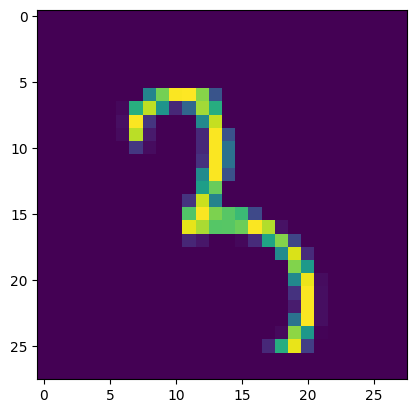

In [59]:
# Primero imprimimos
plt.imshow(imgs[195])

In [60]:
# Ahora calcula las probabilidades para cada clase.
# Acá empieza tu código (~2 líneas)
print(imgs[195].shape)

Pred = red_mnist.predict(imgs[195].reshape(1,784))
print("Pred:", Pred)
clases = np.argmax(Pred, axis=1)
print(clases)

# Acá termina tu código
# Cuáles son las más altas?

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Pred: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]


## Paso 4: Prediciendo Clases

Usa lo que has aprendido antes (en particular la función `np.argmax`) para hacer un trozo de código que, dada una variable que representa un índice entre 0 y 9999, muestre la imagen asociada a ese índice, la etiqueta real de la imagen, la etiqueta predicha por la red. La celda debería generar un output de la siguiente forma

```
etiqueta real: <valor1>
predicción: <valor2>
<imagen>
```

Opcional: si sabes un poco más de python, trata de hacer una función que reciba el índice como input y entregue lo pedido.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
etiqueta real: 3
predicción: [3]


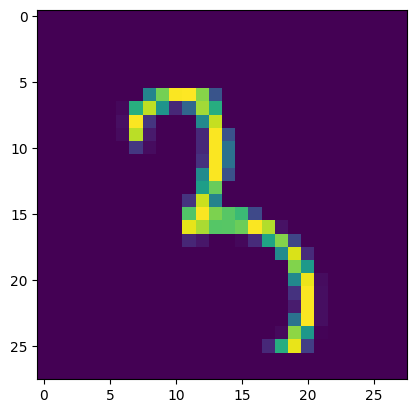

In [ ]:
# Acá empieza tu código (~5 líneas)
def show_img(i):
  predicted_class = red_mnist.predict(imgs[i].reshape(1, 28 * 28))
  print("etiqueta real:", labs[i])
  print("predicción:", np.argmax(predicted_class, axis=1))
  plt.imshow(imgs[i])

show_img(195)
# Acá termina tu código

## Paso 5: Opcional

Haz un trozo de código que calcule cuántas predicciones de la red fueron correctas y cuántas fueron incorrectas, y use esos números para computar un porcentaje de acierto de la red.

Opcional: si sabes algo de numpy, intenta hacer todo el proceso sin hacer iteraciones (de hecho, podrías tratar de hacerlo con y sin iteraciones y luego comprobar cuál es la ganancia en tiempo de hacerlo sin usar una iteración).

In [ ]:
# Acá empieza tu código (~5 líneas)



# Acá termina tu código